## Loading Data from CSV file

In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# Create an empty dataframe
final_df =pd.DataFrame()

# Import dataset
df_modcloth = pd.read_csv('https://github.com/abdo-projects/data-science-portfolio/raw/main/Dataset/df_modcloth.csv')

# Show top results 
df_modcloth.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [2]:
# Check the format of 'Date' column
df_modcloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [3]:
# Check the format of 'Date' column
df_modcloth.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


## Data Transformation

In [4]:
# reorder and select columns related
df = df_modcloth[['timestamp','category']]

# Show top results
df.head()

,timestamp,category
0,2010-01-21 08:00:00+00:00,Dresses
1,2010-01-27 08:00:00+00:00,Dresses
2,2010-01-29 08:00:00+00:00,Dresses
3,2010-02-13 08:00:00+00:00,Dresses
4,2010-02-18 08:00:00+00:00,Dresses


In [5]:
# count the NaN values in a column in pandas DataFrame
df.isna().sum()

timestamp    0
category     0
dtype: int64

In [6]:
# Convert the Strings to Datetime and remove time in the DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Remove day from timestamp
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m')

# Sort a pandas dataframe based on DateTime field
df = df.sort_values(by='timestamp',ascending=True)

# Show top results
df.head()

<ipython-input-6-b09242fb41a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
<ipython-input-6-b09242fb41a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m')


,timestamp,category
0,2010-01,Dresses
1,2010-01,Dresses
2,2010-01,Dresses
3,2010-02,Dresses
4,2010-02,Dresses


In [7]:
# Pivot table based on category and timestamp
df["value"] = 1
table = df.pivot_table(index=['timestamp'], columns = 'category',values='value', aggfunc='sum')

# Show top results
table.head()

category,Bottoms,Dresses,Outerwear,Tops
timestamp,,,,
2010-01,NaN,3.0,NaN,NaN
2010-02,NaN,4.0,NaN,NaN
2010-03,NaN,1.0,NaN,NaN
2010-04,NaN,3.0,1.0,NaN
2010-05,NaN,3.0,NaN,NaN


In [8]:
# Replace NA with 0 For the whole DataFrame using pandas
data = table.fillna(0)

# Show top results
data.head()

category,Bottoms,Dresses,Outerwear,Tops
timestamp,,,,
2010-01,0.0,3.0,0.0,0.0
2010-02,0.0,4.0,0.0,0.0
2010-03,0.0,1.0,0.0,0.0
2010-04,0.0,3.0,1.0,0.0
2010-05,0.0,3.0,0.0,0.0


In [9]:
# storing into the excel file
data.to_excel("output.xlsx")

In [10]:
# Import dataset
data = pd.read_excel('output.xlsx')

# Show top results 
data.head()

,timestamp,Bottoms,Dresses,Outerwear,Tops
0,2010-01,0,3,0,0
1,2010-02,0,4,0,0
2,2010-03,0,1,0,0
3,2010-04,0,3,1,0
4,2010-05,0,3,0,0


In [11]:
# Convert the Strings to Datetime in the DataFrame
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort a pandas dataframe based on DateTime field
data = data.sort_values(by='timestamp',ascending=True)

# make a copy of datarame for ML model later
data_ml = data.copy()

# set Date as an index
data = data.set_index(['timestamp'])
data = data.fillna(method='ffill')

# Show top results
data.head()

,Bottoms,Dresses,Outerwear,Tops
timestamp,,,,
2010-01-01,0,3,0,0
2010-02-01,0,4,0,0
2010-03-01,0,1,0,0
2010-04-01,0,3,1,0
2010-05-01,0,3,0,0


## Read and plot the time series data.

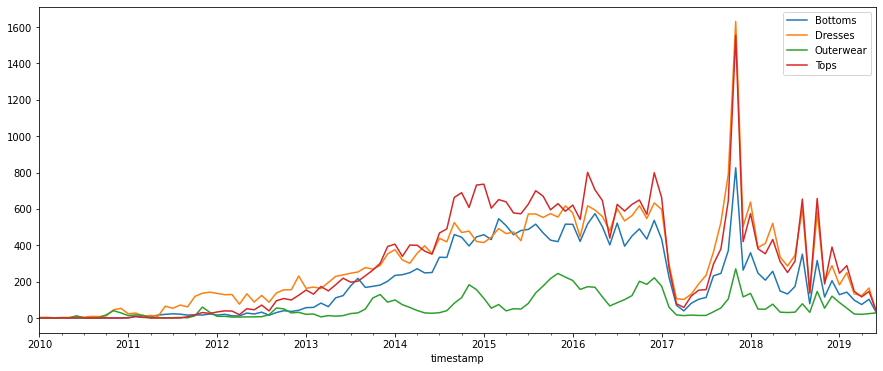

In [12]:
data.plot(figsize=(15, 6))
plt.show()

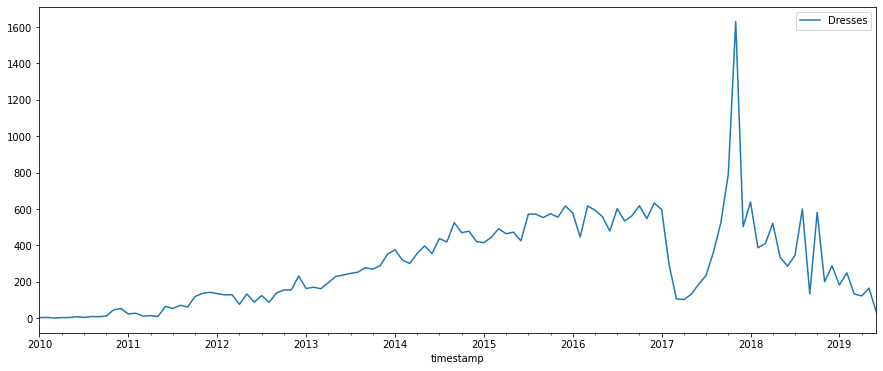

<Figure size 432x288 with 0 Axes>

In [13]:
data.plot(y="Dresses",figsize=(15, 6))
plt.show()
plt.savefig('time-series-plot.png')

## Time Series Analysis and Forecasting with ARIMA

First thing that we should be checking is the Stationarity of the data. We will use ickey-Fuller test (ADF) is used to test the null hypothesis

we are trying to decide whether to accept the Null Hypothesis or go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

In [14]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [15]:
check_stationarity(data.Dresses)

The test statistic: -1.613789
p-value: 0.475987
Critical Values:
1%: -3.494
5%: -2.889
10%: -2.582


From the above output, the p-value is above 0.05, indicating strong evidence that is null hypothesis, thereby accepting the null hypothesis therefore, the data is non-stationarity and require differencing.

### Differencing Data to achieve Stationarity. Also Determine value of d.

In [16]:
import numpy as np
ts_temp_log = np.log(data.Dresses)
ts_temp_log

timestamp
2010-01-01    1.098612
2010-02-01    1.386294
2010-03-01    0.000000
2010-04-01    1.098612
2010-05-01    1.098612
                ...   
2019-02-01    5.517453
2019-03-01    4.890349
2019-04-01    4.804021
2019-05-01    5.105945
2019-06-01    3.433987
Name: Dresses, Length: 114, dtype: float64

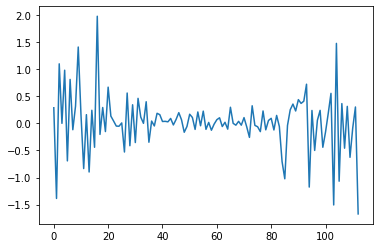

In [17]:
ts_temp_log_diff = np.diff(ts_temp_log)

plt.plot(ts_temp_log_diff)

In [18]:
check_stationarity(ts_temp_log_diff)

The test statistic: -3.934000
p-value: 0.001798
Critical Values:
1%: -3.495
5%: -2.890
10%: -2.582


This time the p-value is 0.001798 which indicts that the dataset is stationarity .

The value of d will be 1 because we have done the data difference two time to achieve stationarity.

### Determine P and Q value from ACF and PACF plot

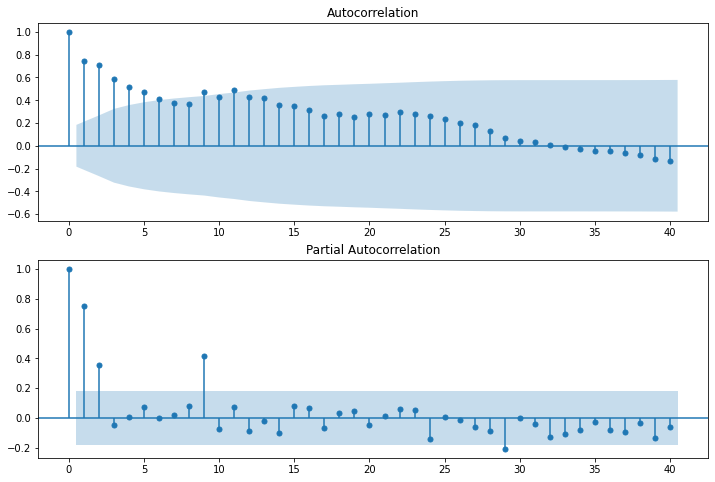

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.Dresses,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.Dresses,lags=40,ax=ax2)

From the above we can determin that AR model will be used for the first model, where p=4 and d=1

### Use auto tune option  p,d and q value.

In [20]:
import pmdarima as pm
auto_arima_fit = pm.auto_arima(data.Dresses, start_p=0, start_q=0,
                             max_p=5, max_q=5, m=12,
                             seasonal=False,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

C:\Users\a7med\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1484.785, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1462.877, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1464.144, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1482.785, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1464.835, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1464.814, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1461.042, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1461.701, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1462.244, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1466.387, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1466.309, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1459.351, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1462.818, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

From the above we can determin that for the second model will be p=2, d=1 and q=1

### Fit First ARIMA model

In [21]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(data.Dresses, order=(1,1,3))
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Dresses   No. Observations:                  114
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -724.811
Date:                Fri, 30 Jul 2021   AIC                           1459.622
Time:                        19:18:43   BIC                           1473.259
Sample:                    01-01-2010   HQIC                          1465.156
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2892      0.497      0.582      0.561      -0.685       1.264
ma.L1         -0.7945      0.534     -1.488      0.137      -1.841       0.252
ma.L2          0.2644      0.245      1.079      0.2

### Pridect the first model using ARIMA.

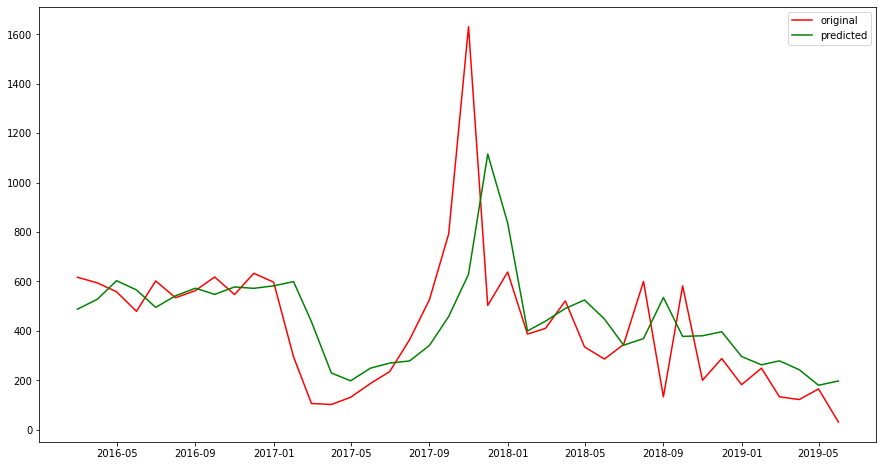

In [47]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15,8))
plt.plot(data.Dresses[-40:],label = 'original', color='r' )
plt.plot(results.predict(-40),label = 'predicted', color='g' )

plt.legend()

### Forecast the first model using ARIMA.

In [23]:
n=20
forecast = results.forecast(steps=n)
df_forecast = pd.DataFrame({'forecast':forecast},index=pd.date_range(start='2019-05', periods=n, freq='MS'))
print(forecast)

2019-07-01    153.187639
2019-08-01    148.676984
2019-09-01    192.709920
2019-10-01    205.446062
2019-11-01    209.129881
2019-12-01    210.195393
2020-01-01    210.503583
2020-02-01    210.592724
2020-03-01    210.618508
2020-04-01    210.625965
2020-05-01    210.628122
2020-06-01    210.628746
2020-07-01    210.628927
2020-08-01    210.628979
2020-09-01    210.628994
2020-10-01    210.628998
2020-11-01    210.629000
2020-12-01    210.629000
2021-01-01    210.629000
2021-02-01    210.629000
Freq: MS, Name: predicted_mean, dtype: float64


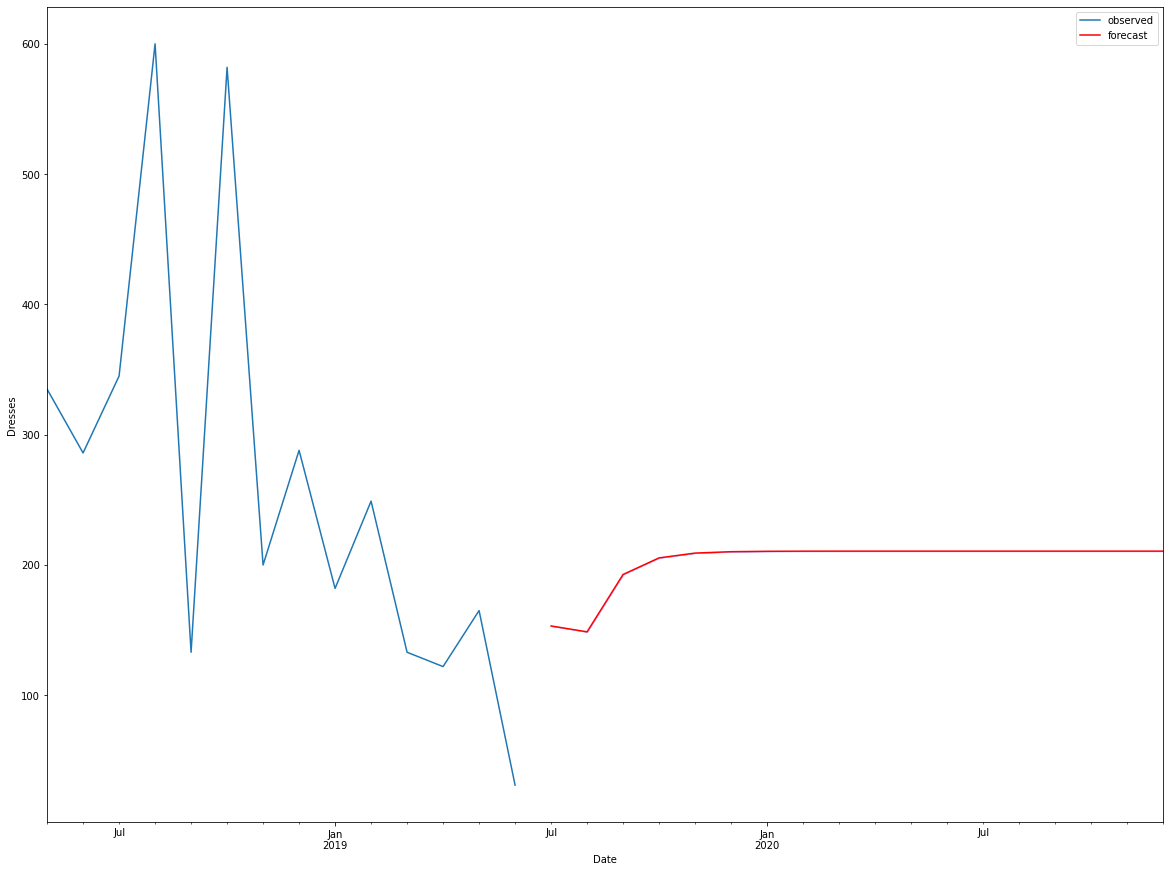

In [24]:
ci = df_forecast.values
ax = data[100:].Dresses.plot(label='observed', figsize=(20, 15))
df_forecast.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast.index,
                ci[:,-1],
                ci[:,0], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Dresses')

plt.legend()
plt.show()

### Residuals Diagnosis for the first model

A model residuals is difference between the predicted and expected value and can be verified using the fitted model property resid().

Residual object is of type ndarray so we will store it in a Dataframe for plotting

In the below line plot we don’t see any large residuals and all of them are within their upper and lower limits

<AxesSubplot:xlabel='timestamp'>

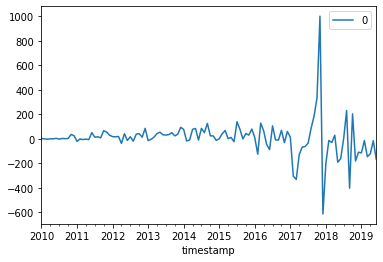

In [25]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

Next we will check if these residuals are normally distributed and looks Gaussian or not. So we will plot the density plot to check this. This looks normal with a long left tail and centered at Zero

<AxesSubplot:ylabel='Density'>

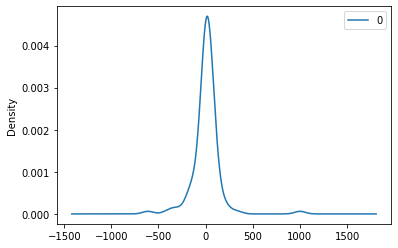

In [26]:
residuals.plot(kind='kde')

The mean of the residual is close to Zero and there is no significant correlation also that we can see in the pacf plot for residuals

In [27]:
residuals.describe()

,0
count,114.000000
mean,6.562597
std,147.158006
min,-612.490624
25%,-13.486825
50%,9.914607
75%,44.093948
max,1001.926358


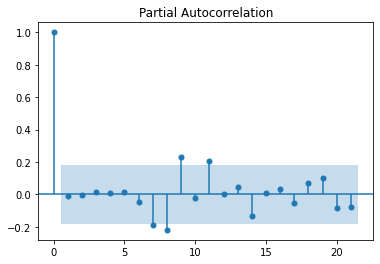

In [28]:
plot_pacf(residuals)
print()

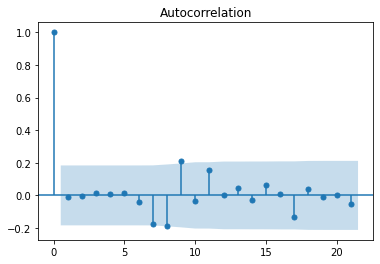

In [29]:
plot_acf(residuals)
print()

The residual diagnostics looks like a white noise since 81.81% of our sample autocorrelations is between the two blue lines and it meets all our criteria for a good forecast and prediction.

So Let’s go ahead and evaluate the Predicted and Expected Values

In [30]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(data.Dresses, results.predict())
print("RMSE first ARIMA model:",rmse) 

# Calculate mean squared error
mse = mean_squared_error(data.Dresses, results.predict())
print("MSE first ARIMA model:",mse)

RMSE first ARIMA model: 146.65805861497716
MSE first ARIMA model: 21508.586156714082


### Fit second ARIMA model

In [31]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima.model import ARIMA

mod_2 = ARIMA(data.Dresses, order=(2,1,1))
results_2 = mod_2.fit()
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                Dresses   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -725.675
Date:                Fri, 30 Jul 2021   AIC                           1459.351
Time:                        19:18:54   BIC                           1470.260
Sample:                    01-01-2010   HQIC                          1463.778
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3712      0.137      2.718      0.007       0.104       0.639
ar.L2          0.2664      0.117      2.269      0.023       0.036       0.497
ma.L1         -0.9013      0.161     -5.614      0.0

### Predict the second model using ARIMA.

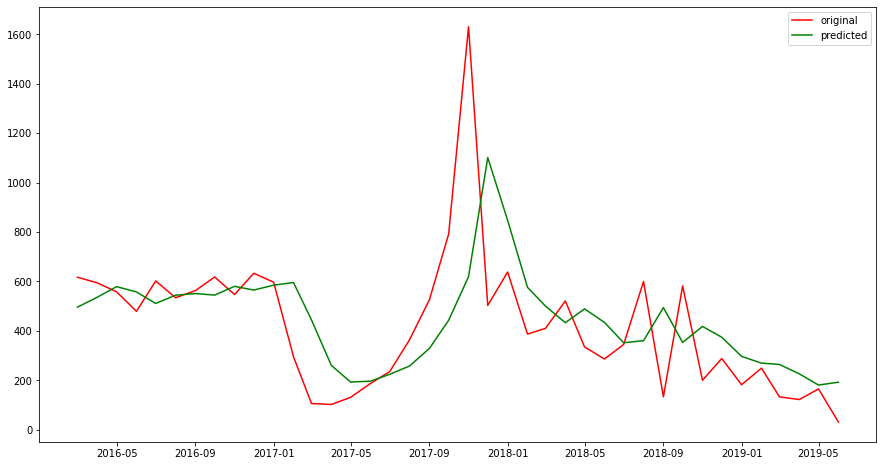

In [49]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(15,8))
plt.plot(data.Dresses[-40:],label = 'original', color='r' )
plt.plot(results_2.predict(-40),label = 'predicted', color='g' )

plt.legend()

### Forecast the second model using ARIMA.

In [33]:
n=20
forecast_2 = results_2.forecast(steps=n)
df_forecast_2 = pd.DataFrame({'forecast':forecast_2},index=pd.date_range(start='2019-05', periods=n, freq='MS'))
print(df_forecast_2)

              forecast
2019-05-01         NaN
2019-06-01         NaN
2019-07-01  137.975504
2019-08-01  141.982774
2019-09-01  171.972208
2019-10-01  184.171999
2019-11-01  196.690788
2019-12-01  204.588220
2020-01-01  210.855191
2020-02-01  215.285644
2020-03-01  218.599970
2020-04-01  221.010676
2020-05-01  222.788583
2020-06-01  224.090839
2020-07-01  225.047933
2020-08-01  225.750173
2020-09-01  226.265849
2020-10-01  226.644369
2020-11-01  226.922269
2020-12-01  227.126277


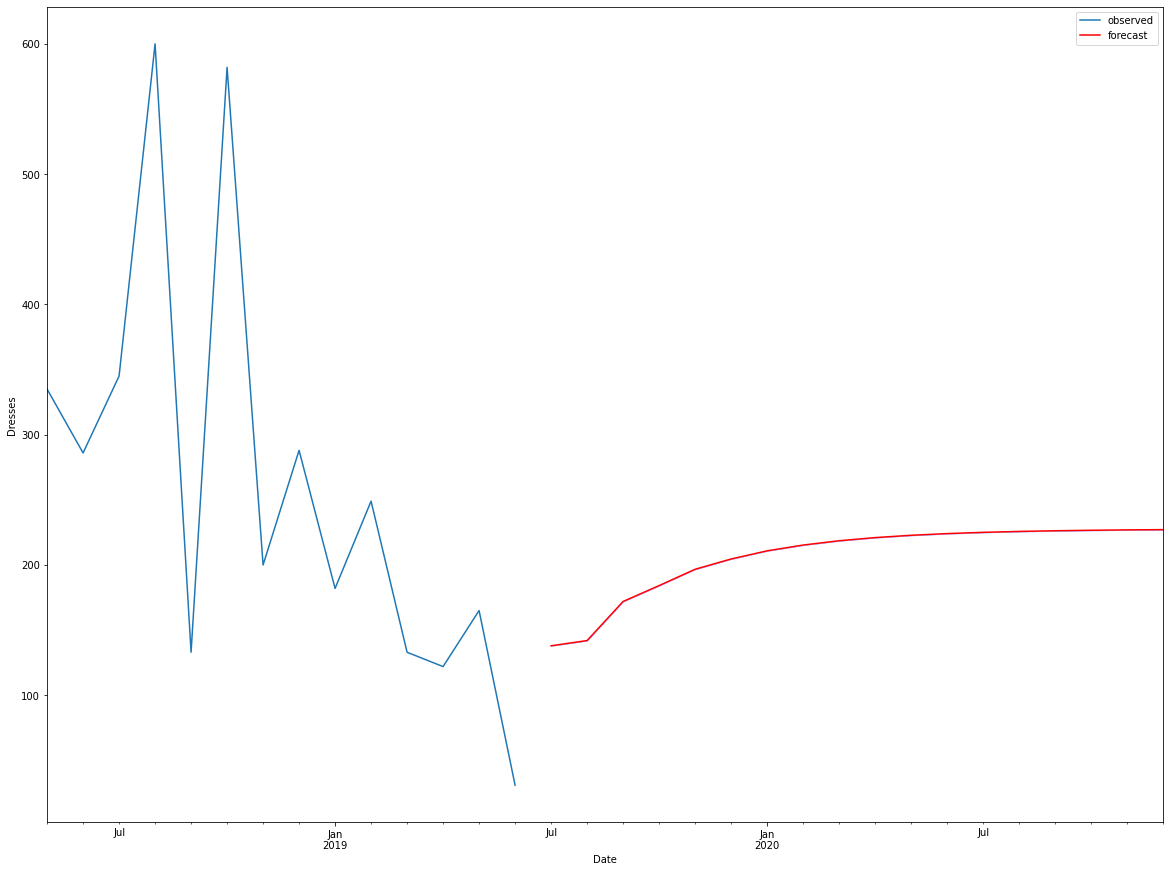

In [34]:
ci = df_forecast_2.values
ax = data[100:].Dresses.plot(label='observed', figsize=(20, 15))
df_forecast_2.plot(ax=ax,label='Forecast',color='r')
ax.fill_between(df_forecast_2.index,
                ci[:,-1],
                ci[:,0], color='b', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Dresses')

plt.legend()
plt.show()

### Residuals Diagnosis for the second model

<AxesSubplot:xlabel='timestamp'>

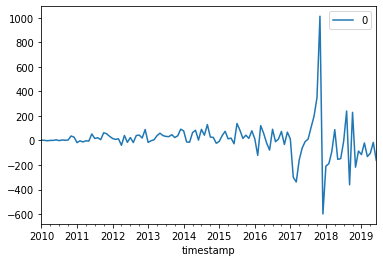

In [35]:
residuals_2 = pd.DataFrame(results_2.resid)
residuals_2.plot()

<AxesSubplot:ylabel='Density'>

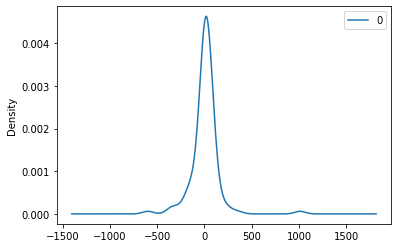

In [36]:
residuals_2.plot(kind='kde')

In [37]:
residuals_2.describe()

,0
count,114.000000
mean,7.200940
std,148.344718
min,-598.374941
25%,-15.573132
50%,12.125242
75%,43.607706
max,1011.750691


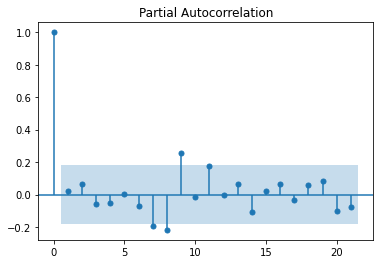

In [38]:
plot_pacf(residuals_2)
print()

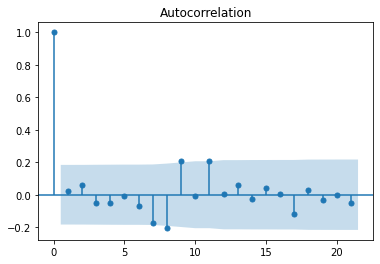

In [39]:
plot_acf(residuals_2)
print()

The residual diagnostics looks like a white noise since 77.27% of our sample autocorrelations is between the two blue lines and it meets all our criteria for a good forecast and prediction.

So Let’s go ahead and evaluate the Predicted and Expected Values

In [40]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(data.Dresses, results_2.predict())
print("RMSE second ARIMA model:",rmse) 

# Calculate mean squared error
mse = mean_squared_error(data.Dresses, results_2.predict())
print("MSE second ARIMA model:",mse)

RMSE second ARIMA model: 147.86809129558844
MSE second ARIMA model: 21864.972423400483
